In [15]:
import scipy.misc 
from scipy import io
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statistics
from matplotlib import cm
Dataset_MATLAB = io.loadmat('dataset.mat')
data_X = pd.DataFrame(Dataset_MATLAB['X'])
data_y = pd.DataFrame(Dataset_MATLAB['Y'])
X = data_X.iloc[:,0:4]
y = data_y.iloc[:,:1]


In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [21]:

from sklearn import svm
def calculate_poly(X_train,y_train,X_test,y_test,degree,C):
    classifier_poly.fit(X_train,y_train)
    y_pred=classifier_poly.predict(X_test)
    score=classifier_poly.score(X_test,y_test)
    loss_poly[degree,counter]=1-score
    #print("Accuracy: ",score," Degree: ",degree," C: ",C)

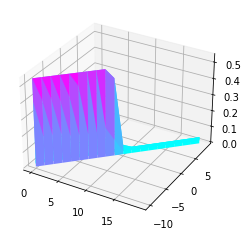

In [23]:
#polynomial Kernel
loss_poly= np.zeros((len(range(0,20)),len(range(-10,10))))
for degree in range(1,20):
    counter=0
    for C in range(-10,10):
        classifier_poly=svm.SVC(kernel='poly',degree=degree,C=7**C)
        calculate_poly(X_train,y_train.values.ravel(),X_test,y_test,degree,C)
        counter+=1
figure,axes = plt.subplots(subplot_kw={"projection": "3d"})
surf = axes.plot_surface(np.arange(0,20),np.arange(-10,10), loss_poly,cmap=cm.cool)
plt.show()

In [25]:
def calculate_rbf(X_train,y_train,X_test,y_test,counter1,counter2,gamma,C):
    classifier_rbf.fit(X_train,y_train)
    y_pred=classifier_rbf.predict(X_test)
    score=classifier_rbf.score(X_test,y_test)
    loss_rbf[counter1,counter2]=1-score
    #print("Accuracy: ",score," Gamma: ",gamma, " C: ",C)

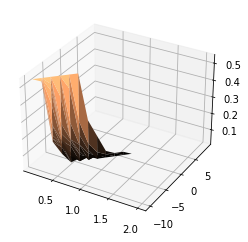

In [27]:
#rbf Kernel
loss_rbf = np.zeros((len(np.arange(0.1,2,0.1)),len(np.arange(-10,10))))
counter1=0
for gamma in np.arange(0.1,2,0.1):
    counter2=0
    for C in range(-10,10):
        classifier_rbf=svm.SVC(kernel='poly',gamma=gamma,C=7**C)
        calculate_rbf(X_train,y_train.values.ravel(),X_test,y_test,counter1,counter2,gamma,C)
        counter2+=1
    counter1+=1
figure, axes = plt.subplots(subplot_kw={"projection": "3d"})
surf = axes.plot_surface(np.arange(0.1,2.1,0.1),np.arange(-10,10),loss_rbf, cmap=cm.copper)
plt.show()

In [29]:
def calculate_linear(X_train,y_train,X_test,y_test,C):   
    classifier_linear.fit(X_train,y_train)
    y_pred=classifier_linear.predict(X_test)
    score=classifier_linear.score(X_test,y_test)
    loss_linear[counter]=1-score
    #print("Accuracy: ",score," C: " ,C)

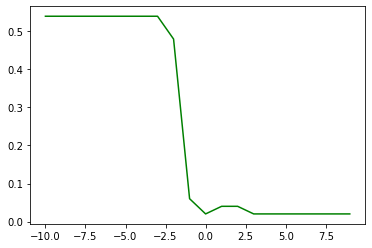

In [33]:
#linear Kernel

counter=0
loss_linear= np.zeros((len(range(-10,10)),1))
for C in range(-10,10):
    classifier_linear=svm.SVC(kernel='linear',gamma=1,C=10**C)
    calculate_linear(X_train,y_train.values.ravel(),X_test,y_test,C)
    counter+=1
plt.plot(np.arange(-10,10), loss_linear, color='green')
plt.show()